In [1]:
import pandas as pd 
import os 

In [2]:
pwd = os.getcwd()

In [3]:
phish_address_info = pd.read_csv(pwd + '/phishing_address.csv')

In [4]:
phish_address_info.head()

,address,name_tag,balance,tx_count,description,type,label
0,0x4ac6307a85d83962503f86457de9c331a6926f48,Fake_Phishing3200,0.13920182 Ether,"68,554",A list of addresses related to phishing and ha...,accounts,phish-hack
1,0xb2628597aac64b136c2aae3a516ea79a44817d77,Fake_Phishing4645,0.2592687 Ether,"24,243",A list of addresses related to phishing and ha...,accounts,phish-hack
2,0xc2d7cf95645d33006175b78989035c7c9061d3f9,Fake_Phishing1670,0 Ether,"7,096",A list of addresses related to phishing and ha...,accounts,phish-hack
3,0x4639cd8cd52ec1cf2e496a606ce28d8afb1c792f,CBDAO: BREE Token,0 Ether,"6,958",A list of addresses related to phishing and ha...,accounts,phish-hack
4,0x903bb9cd3a276d8f18fa6efed49b9bc52ccf06e5,Fake_Phishing749,0 Ether,"5,233",A list of addresses related to phishing and ha...,accounts,phish-hack


In [11]:

count = 0
data = []

for file in os.listdir(pwd + "/钓鱼一阶节点/"):
    if file.endswith(".csv"):
        item = {}
        df = pd.read_csv(pwd + "/钓鱼一阶节点/" + file)
        print("Process: {}".format(file.split('.')[0]))
        if len(df) > 5:
            # 按照时间戳进行排序
            df = df.sort_values(by='TimeStamp')
            df['is_out'] = df['From'] == file.split('.')[0]
            df['tx_value'] = df['Value'] * df['is_out'].apply(lambda x: -1 if x else 1)
            # 账户余额的变化
            df['balance'] = df['tx_value'].cumsum()
            item['tx'] = df
            item['address'] = file.split('.')[0]
            try:
                item['balance'] = phish_address_info[phish_address_info['address'] == file.split('.')[0]]['balance'].values[0]
                item['nametag'] = phish_address_info[phish_address_info['address'] == file.split('.')[0]]['name_tag'].values[0]
            except:
                item['balance'] = 0
                item['nametag'] = ''
            data.append(item)

Process: 0x002bf459dc58584d58886169ea0e80f3ca95ffaf
Process: 0x002f0c8119c16d310342d869ca8bf6ace34d9c39
Process: 0x0059b14e35dab1b4eee1e2926c7a5660da66f747
Process: 0x0061fb5485dff4bb85c078dca80d19119224d97e
Process: 0x00650a784ee109797ba8c05f3496bdbf2b2b7a1c
Process: 0x0084515449b037205a33d6d3940a5684126aa4b5
Process: 0x00c33c49f9a2a920e3f3787204cbda9012d1912e
Process: 0x00eb6f5199cd0b671da371969b1a0f948e982fea
Process: 0x0128282ce73c72decabaeace9358344adff449fe
Process: 0x015c0e438b3a01511b98d928bd031d3dc50abb9e
Process: 0x015fca1d09287823e634ae51237ee1eeff03d9d5
Process: 0x0167409e6106ec3e3f05a09fcf04606918d21ad5
Process: 0x0177eb92b752fa0715ee0dce1d860eaf739b5cf4
Process: 0x017f86b90a46d8fd999eaefda1339355b98da12f
Process: 0x018f2f4b3c9e38607aa7ab4dea23e9d663e3e050
Process: 0x020b1573f2ca670190d33ca2f0a57b0c0399ad37
Process: 0x024c344da7208e60356378a252dab771c34be111
Process: 0x026e78f168df546aabb2733b37920c55b335be80
Process: 0x0275a8960fcb1235b095cb9f40edcae031eae5fd
Process: 0x0

In [12]:
len(data)

1163

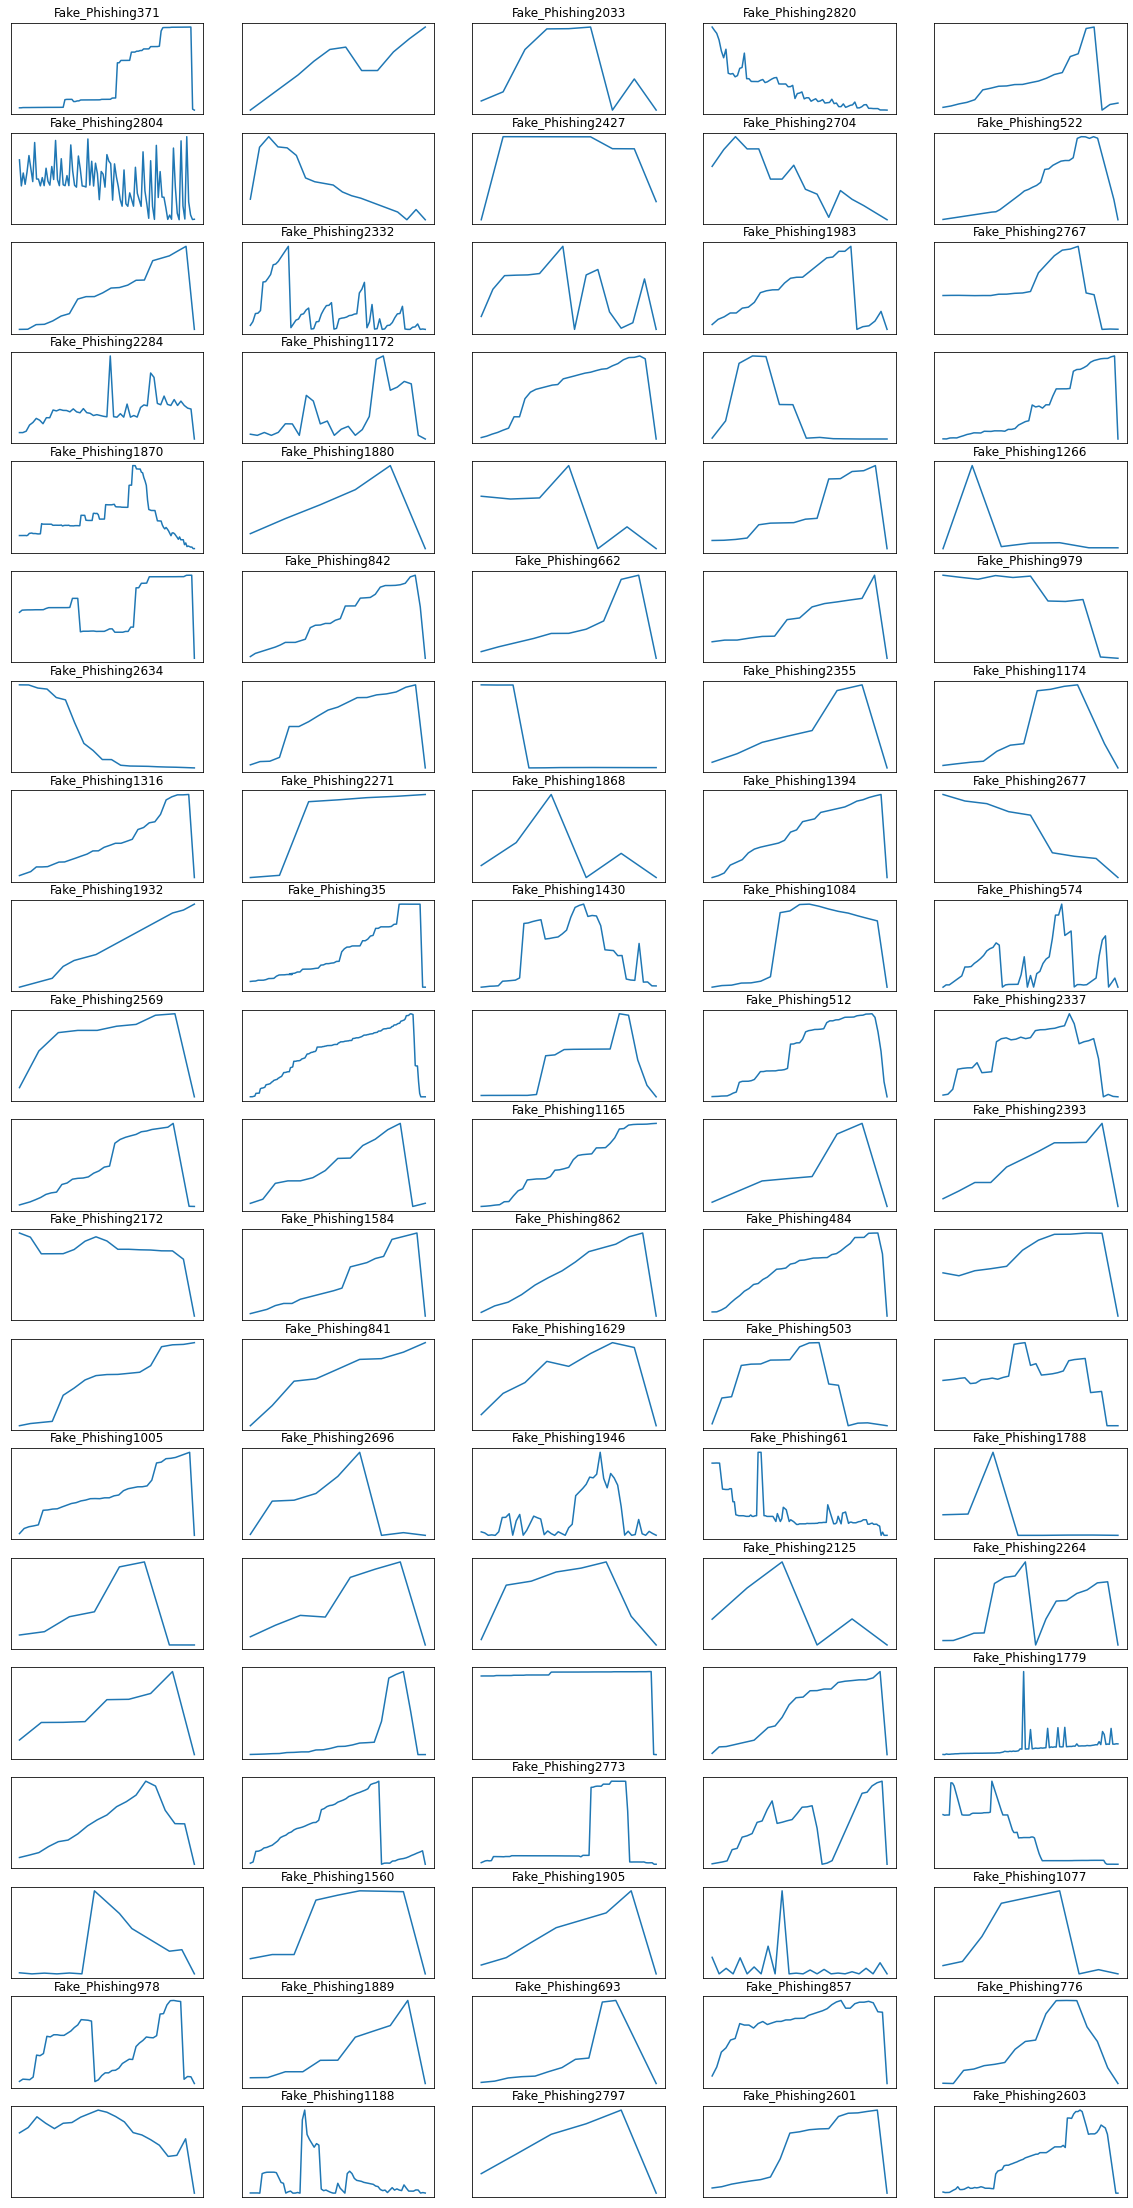

In [17]:
# 画data中datafram的balance的变化图, 画再不同的子图上
import matplotlib.pyplot as plt

# 共画30张子图
subgraph_num = 100

# 一行画6张子图
row_num = 20

# 一列画5张子图
col_num = 5

# 画图的大小
fig_size = (20, 40)

fig, axes = plt.subplots(row_num, col_num, figsize=fig_size)

for i in range(subgraph_num):
    ax = axes[i // col_num, i % col_num]
    data[i]['tx']['balance'].plot(ax=ax)
    ax.set_title(data[i]['nametag'])
    # 去除坐标轴
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()